In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 문제1

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%config InlineBackend.figure_format = "retina"

sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False) 

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df_first = pd.read_csv('C:/Users/Admin/AI/downloads/shareData/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [19]:
df_first.isna().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [5]:
df_first_heat = df_first.set_index('지역')
df_first_heat.head(1)

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


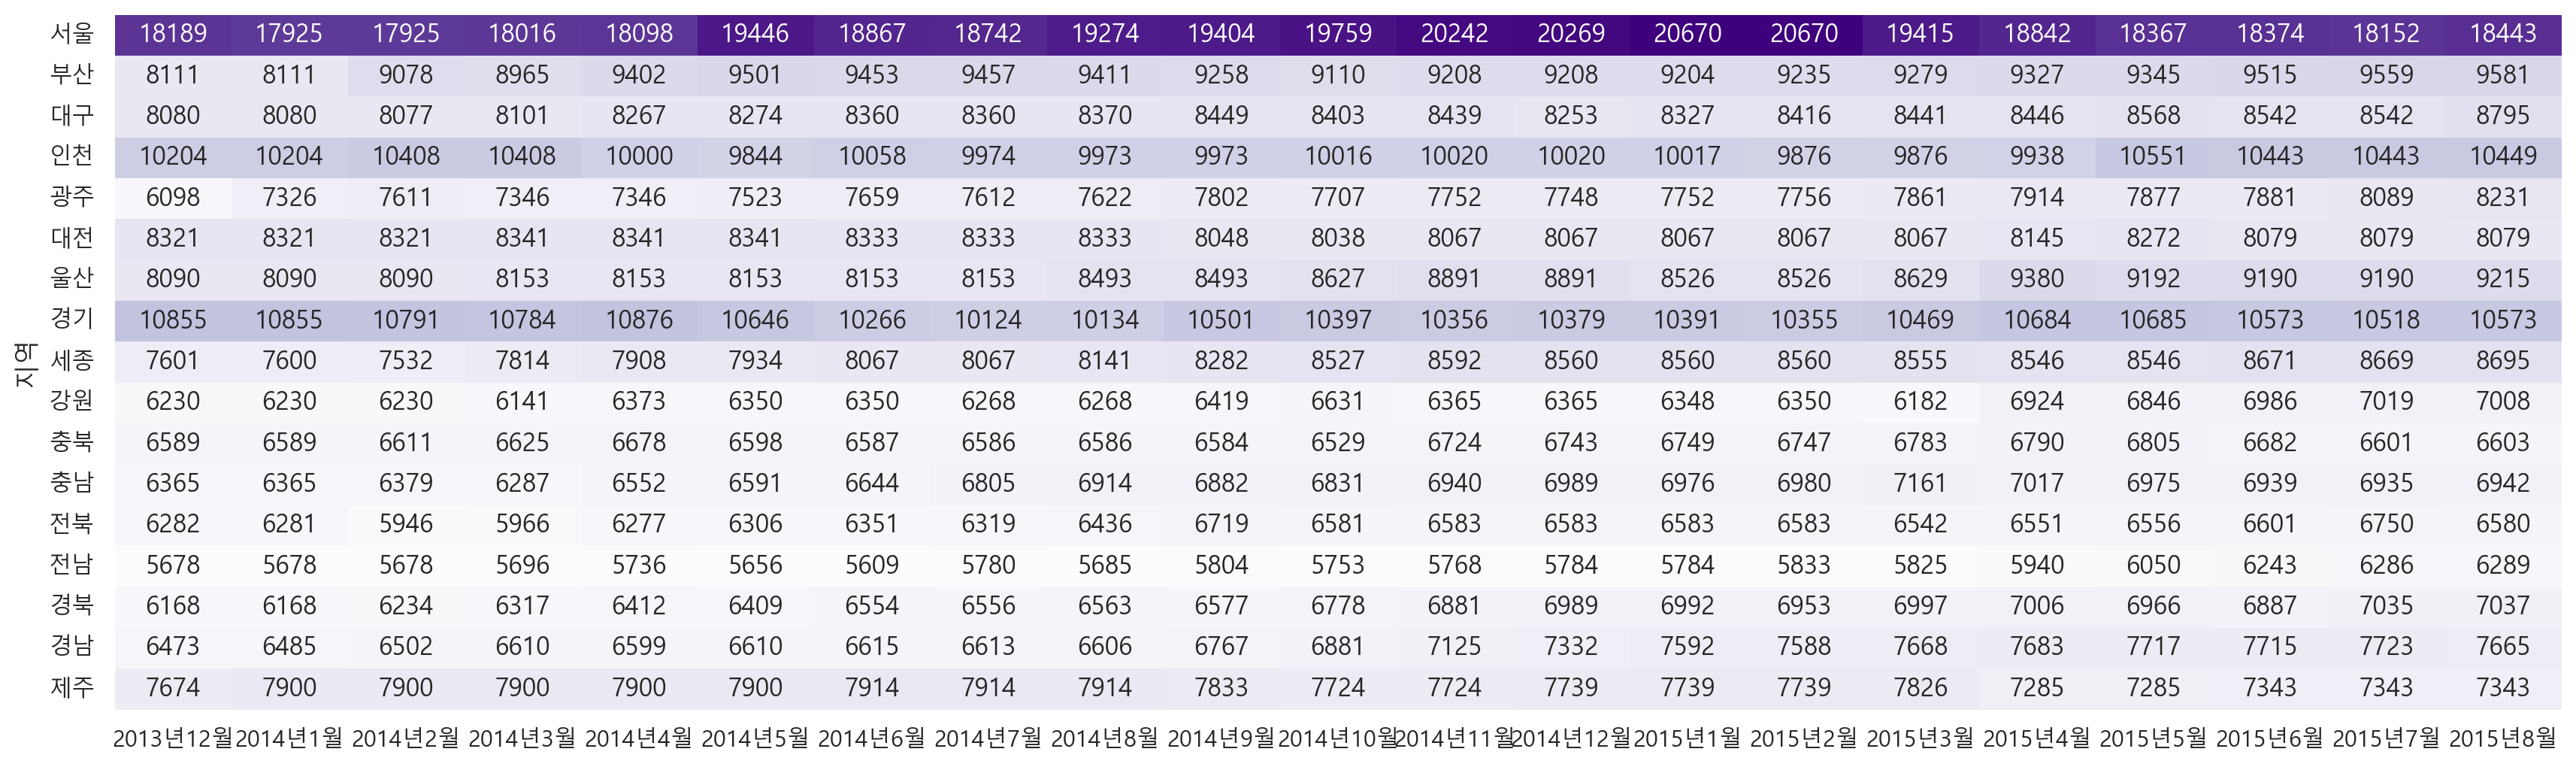

In [18]:
plt.figure(figsize=(21,6))
sns.heatmap(df_first_heat, annot=True, fmt='d', cbar=False, cmap='Purples')
plt.xticks(rotation=0)
plt.show()

# 문제2

In [46]:
df_last = pd.read_csv('C:/Users/Admin/AI/downloads/shareData/부동산/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv', encoding='cp949')
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841


In [24]:
df_last[df_last['분양가격(제곱미터)'].isna()]

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN
374,대전,전용면적 102제곱미터초과,2016,2,NaN
388,강원,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
421,제주,전용면적 60제곱미터이하,2016,2,NaN
...,...,...,...,...,...
9078,전남,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN
9081,경북,전용면적 60제곱미터이하,2024,8,NaN
9088,경남,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN
9091,제주,전용면적 60제곱미터이하,2024,8,NaN


In [31]:
def commadrop(row):
    row = row.copy()
    price = row['분양가격(제곱미터)']
    if price is np.nan:
        pass
    elif price.strip()=='':
        row['분양가격(제곱미터)'] = np.nan
    elif price.find(',') != -1:
        row['분양가격(제곱미터)'] = float(''.join(price.split(',')))
    else:
        row['분양가격(제곱미터)'] = float(price)
    return row
    
commadrop(df_last.loc[9093])

지역명                                제주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2024
월                                   8
분양가격(제곱미터)                        NaN
Name: 9093, dtype: object

In [47]:
df_last = df_last.apply(commadrop, axis=1)
df_last.sample()

,지역명,규모구분,연도,월,분양가격(제곱미터)
5008,경남,전용면적 85제곱미터초과 102제곱미터이하,2020,8,4939.0


In [48]:
df_last['평당분양가격'] = df_last['분양가격(제곱미터)'] * 3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [49]:
import re
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : re.sub('전용면적|이하| ','',x).replace('제곱미터','m²').replace('초과','~'))
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6,60m²
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6,60m²~85m²
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3,85m²~102m²
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7,102m²~


In [50]:
df_last.drop(['규모구분','분양가격(제곱미터)'], axis=1, inplace=True)
df_last.head(1)

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적


In [51]:
col = df_last.pop('전용면적')
df_last.insert(1, '전용면적', col)
df_last

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60m²,2015,10,18651.6
2,서울,60m²~85m²,2015,10,19410.6
3,서울,85m²~102m²,2015,10,18879.3
4,서울,102m²~,2015,10,19400.7
...,...,...,...,...,...
9090,제주,모든면적,2024,8,25419.9
9091,제주,60m²,2024,8,NaN
9092,제주,60m²~85m²,2024,8,24799.5
9093,제주,85m²~102m²,2024,8,NaN


# 문제3

In [53]:
df_last.pivot_table(index='연도', columns='지역명', values='평당분양가격')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


# 문제4

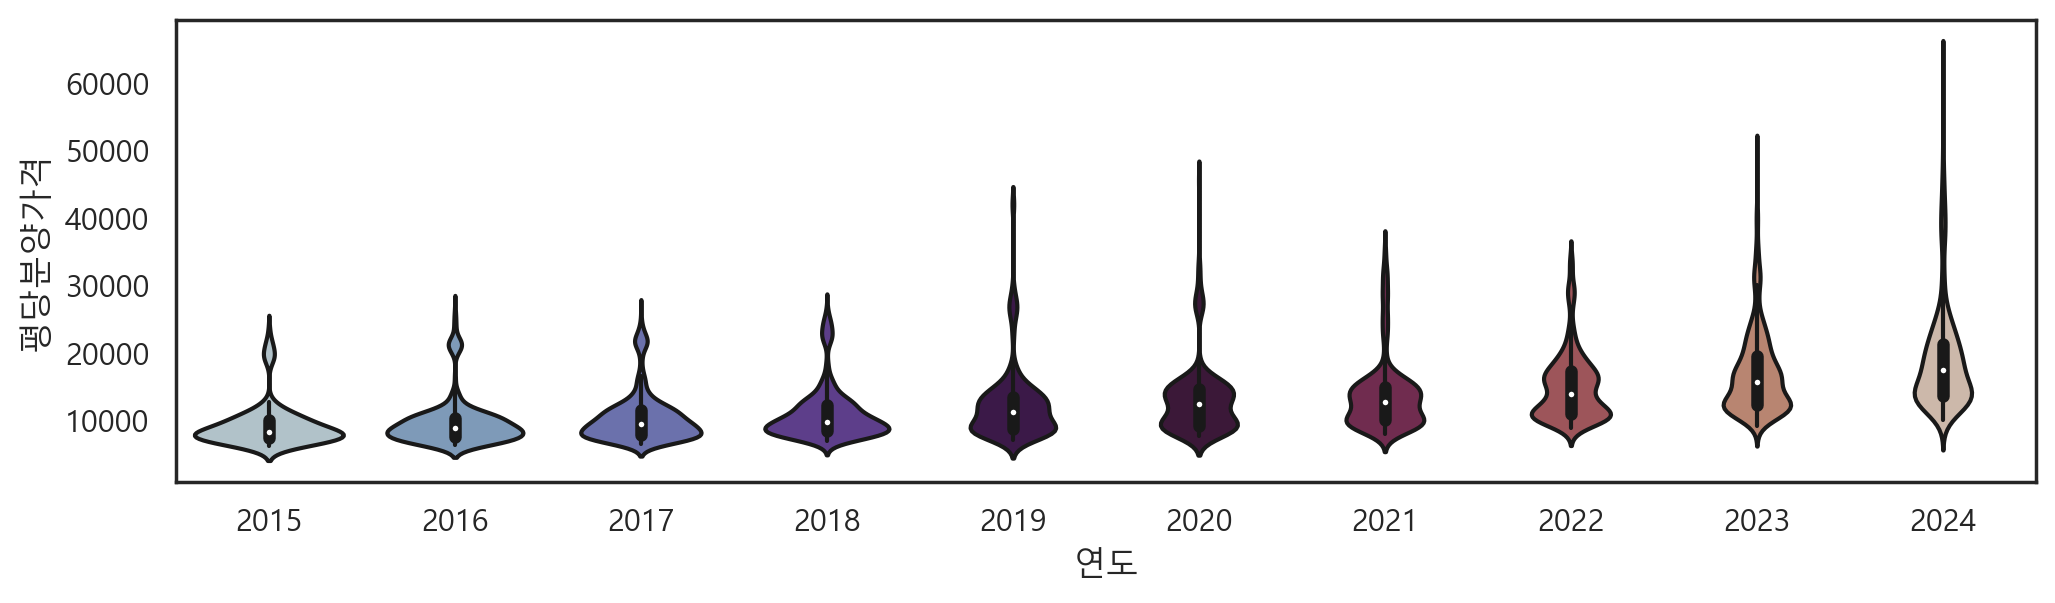

In [55]:
sns.violinplot(data=df_last, x='연도', y='평당분양가격', palette='twilight')
plt.show()

# 문제5

In [56]:
display(df_first.head(1))
display(df_last.head(1))

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3


In [59]:
df_first = df_first.melt(id_vars='지역', var_name='연도월', value_name='평당분양가격')
df_first.head()

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [61]:
date_split = lambda x : int(x.split('년')[0])
date_split('2013년12월')

2013

In [62]:
df_first['연도'] = df_first['연도월'].apply(lambda x : int(x.split('년')[0]))
df_first['월'] = df_first['연도월'].apply(lambda x : int(x.split('년')[1].replace('월','')))
df_first.head(1)

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [66]:
df_first.drop('연도월', axis=1, inplace=True)
df_first.head(1)

,지역,평당분양가격,연도,월
0,서울,18189,2013,12


In [69]:
df_first.rename(columns={'지역':'지역명'}, inplace=True)
df_first

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12
...,...,...,...,...
352,전북,6580,2015,8
353,전남,6289,2015,8
354,경북,7037,2015,8
355,경남,7665,2015,8


In [74]:
df_last

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60m²,2015,10,18651.6
2,서울,60m²~85m²,2015,10,19410.6
3,서울,85m²~102m²,2015,10,18879.3
4,서울,102m²~,2015,10,19400.7
...,...,...,...,...,...
9090,제주,모든면적,2024,8,25419.9
9091,제주,60m²,2024,8,NaN
9092,제주,60m²~85m²,2024,8,24799.5
9093,제주,85m²~102m²,2024,8,NaN


In [76]:
df_last = df_last[df_last['전용면적']=='모든면적']
df_last.head()

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
5,인천,모든면적,2015,10,10437.9
10,경기,모든면적,2015,10,10355.4
15,부산,모든면적,2015,10,10269.6
20,대구,모든면적,2015,10,8850.6


In [78]:
df_last.drop('전용면적', axis=1, inplace=True)
df_last.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [79]:
df = pd.concat([df_first, df_last]).reset_index(drop=True)
df

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
2171,전북,12058.2,2024,8
2172,전남,13120.8,2024,8
2173,경북,13827.0,2024,8
2174,경남,13252.8,2024,8
